#  CottonNet: Cotton Disease Prediction using VGG16
### Using Advanced techniques like :
* Transfer Learning
* Data Augmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

## Fetch / Load the Data

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 94% 139M/148M [00:01<00:00, 114MB/s] 
100% 148M/148M [00:01<00:00, 95.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cotton-disease-dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Data Augmenatation

In [5]:
IMAGE_SIZE = (224, 224)

In [6]:
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    '/content/Cotton Disease/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Cotton Disease/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


## Build the CNN model

### Load the VGG16 model and set trainable to false

In [12]:
conv_base = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
# Freezing the conv_base (making it non-trainable)
for layer in conv_base.layers:
  layer.trainable = False

In [14]:
flatten = Flatten()(conv_base.output)
dense1 = Dense(64, activation='relu')(flatten)
dense2 = Dense(32, activation='relu')(dense1)
prediction = Dense(4, activation='softmax')(dense2)

model = Model(inputs=conv_base.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit_generator(train_generator, epochs=10, validation_data=test_generator)

<ipython-input-17-c61f59e3ffb0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
61/61 [==============================] - 58s 743ms/step - loss: 0.8764 - accuracy: 0.6756 - val_loss: 0.5128 - val_accuracy: 0.7453
Epoch 2/10
61/61 [==============================] - 39s 636ms/step - loss: 0.4122 - accuracy: 0.8447 - val_loss: 0.3881 - val_accuracy: 0.8396
Epoch 3/10
61/61 [==============================] - 39s 646ms/step - loss: 0.3144 - accuracy: 0.8785 - val_loss: 0.3065 - val_accuracy: 0.9057
Epoch 4/10
61/61 [==============================] - 39s 632ms/step - loss: 0.3009 - accuracy: 0.8867 - val_loss: 0.2125 - val_accuracy: 0.9340
Epoch 5/10
61/61 [==============================] - 38s 628ms/step - loss: 0.2827 - accuracy: 0.8913 - val_loss: 0.1593 - val_accuracy: 0.9434
Epoch 6/10
61/61 [==============================] - 39s 646ms/step - loss: 0.2425 - accuracy: 0.9113 - val_loss: 0.1760 - val_accuracy: 0.9434
Epoch 7/10
61/61 [==============================] - 39s 633ms/step - loss: 0.2334 - accuracy: 0.9149 - val_loss: 0.2336 - val_accuracy: 0.9151

## Plotting the accuracy and loss after each epoch

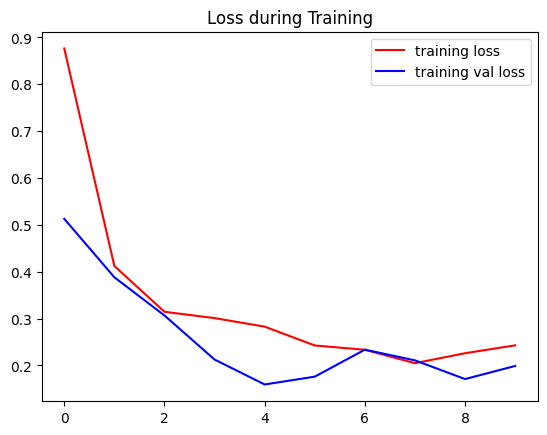

In [18]:
plt.title('Loss during Training')
plt.plot(history.history['loss'], color='red', label='training loss')
plt.plot(history.history['val_loss'], color='blue', label='training val loss')
plt.legend()
plt.show()

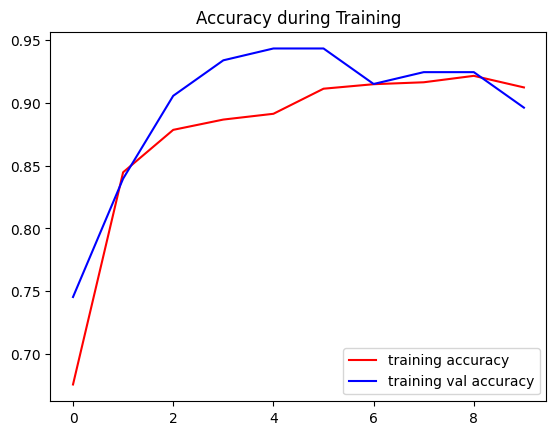

In [19]:
plt.title('Accuracy during Training')
plt.plot(history.history['accuracy'], color='red', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='training val accuracy')
plt.legend()
plt.show()

## Testing out the model

In [26]:
import numpy as np
from PIL import Image

classes = ['Diseased Cotton Leaf', 'Diseased Cotton Plant', 'Fresh Cotton Leaf', 'Fresh Cotton Plant']

def predict(img_path):
  img = Image.open(img_path)
  plt.imshow(img)
  resized_img = img.resize((224, 224))
  img_array = np.array(resized_img)
  reshaped_array = img_array.reshape((1, 224, 224, 3))
  raw_prediction = model.predict(reshaped_array)
  class_num = np.argmax(raw_prediction)
  print(f'Model Output : {class_num}')


1/1 [==============================] - 0s 26ms/step
Model Output : 0


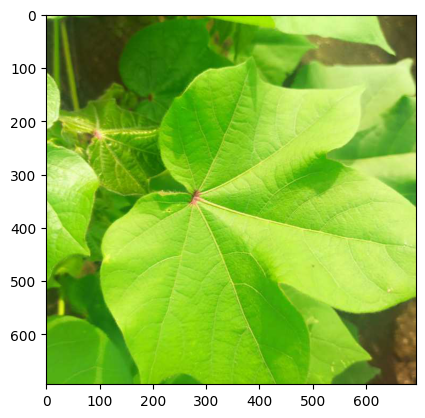

In [27]:
predict('/content/d (59)_iaip.jpg')

1/1 [==============================] - 0s 43ms/step
Model Output : 1


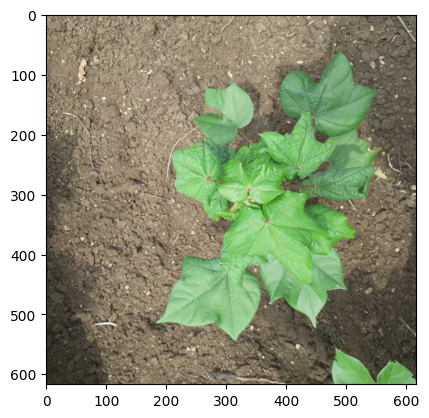

In [28]:
predict('/content/dd (56)_iaip.jpg')

1/1 [==============================] - 0s 84ms/step
Model Output : 0


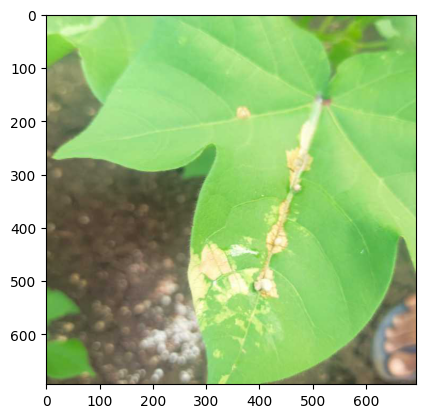

In [29]:
predict('/content/dis_leaf (9)_iaip.jpg')

1/1 [==============================] - 0s 30ms/step
Model Output : 1


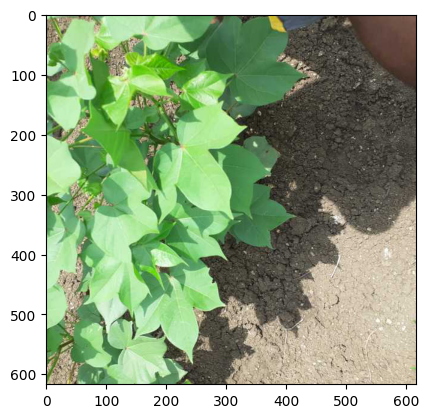

In [30]:
predict('/content/dsd (166)_iaip.jpg')

## Saving the Model

In [31]:
model.save('vgg16_cottonnet.h5')